In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [117]:
# load and display the train.csv file
data = pd.read_csv("CW1_train.csv")
data.head()

,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [118]:
# Display info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  10000 non-null  float64
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   price    10000 non-null  int64  
 8   x        10000 non-null  float64
 9   y        10000 non-null  float64
 10  z        10000 non-null  float64
 11  a1       10000 non-null  float64
 12  a2       10000 non-null  float64
 13  a3       10000 non-null  float64
 14  a4       10000 non-null  float64
 15  a5       10000 non-null  float64
 16  b1       10000 non-null  float64
 17  b2       10000 non-null  float64
 18  b3       10000 non-null  float64
 19  b4       10000 non-null  float64
 20  b5       10000 non-null  float64
 21  a6       1000

From this we can see that the training data has 10,000 rows and 31 columns.

27 of the features are of type float with one feature being of type interger (price) and there are 3 categorical features (cut, color and clarity)

There are no missing values has as all the columns have 10,000 non-null values

In [119]:
# Get statistical summary of numerical features
data.describe()

,outcome,carat,depth,table,price,x,y,z,a1,a2,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.979081,0.798407,61.748060,57.467360,3910.841900,5.733974,5.741665,3.540757,0.502349,0.507509,...,-0.011806,-0.009992,-0.021856,-0.009286,-0.012731,-0.007407,-0.002919,-0.015392,0.000051,-0.008890
std,12.722224,0.472046,1.429631,2.247036,3940.369616,1.114850,1.228057,0.692502,0.291012,0.291207,...,0.999700,1.000633,1.010847,1.010200,1.003570,0.997181,0.992112,0.991442,1.005808,1.005258
min,-44.879471,0.200000,50.800000,44.000000,326.000000,0.000000,0.000000,0.000000,0.000128,0.000101,...,-3.750688,-3.701252,-3.810713,-3.549324,-3.532430,-3.740254,-3.987845,-4.244733,-3.649063,-3.862407
25%,-13.989962,0.400000,61.000000,56.000000,965.000000,4.730000,4.740000,2.920000,0.249922,0.251350,...,-0.672814,-0.697088,-0.696779,-0.674015,-0.681433,-0.687482,-0.666360,-0.678384,-0.667726,-0.680576
50%,-5.442794,0.710000,61.900000,57.000000,2441.000000,5.700000,5.720000,3.530000,0.502063,0.510046,...,-0.013058,0.000265,-0.005496,-0.010254,-0.017385,0.001915,0.022894,-0.009743,-0.010082,-0.016215
75%,3.918593,1.040000,62.500000,59.000000,5226.000000,6.530000,6.530000,4.030000,0.753191,0.764731,...,0.640883,0.673117,0.645305,0.669159,0.671203,0.659154,0.654947,0.653020,0.684738,0.656871
max,39.675966,4.000000,70.500000,73.000000,18791.000000,10.010000,58.900000,8.060000,0.999789,0.999976,...,3.601364,3.593209,4.243395,3.714985,4.135685,4.012513,3.812652,3.996531,3.808169,3.471238


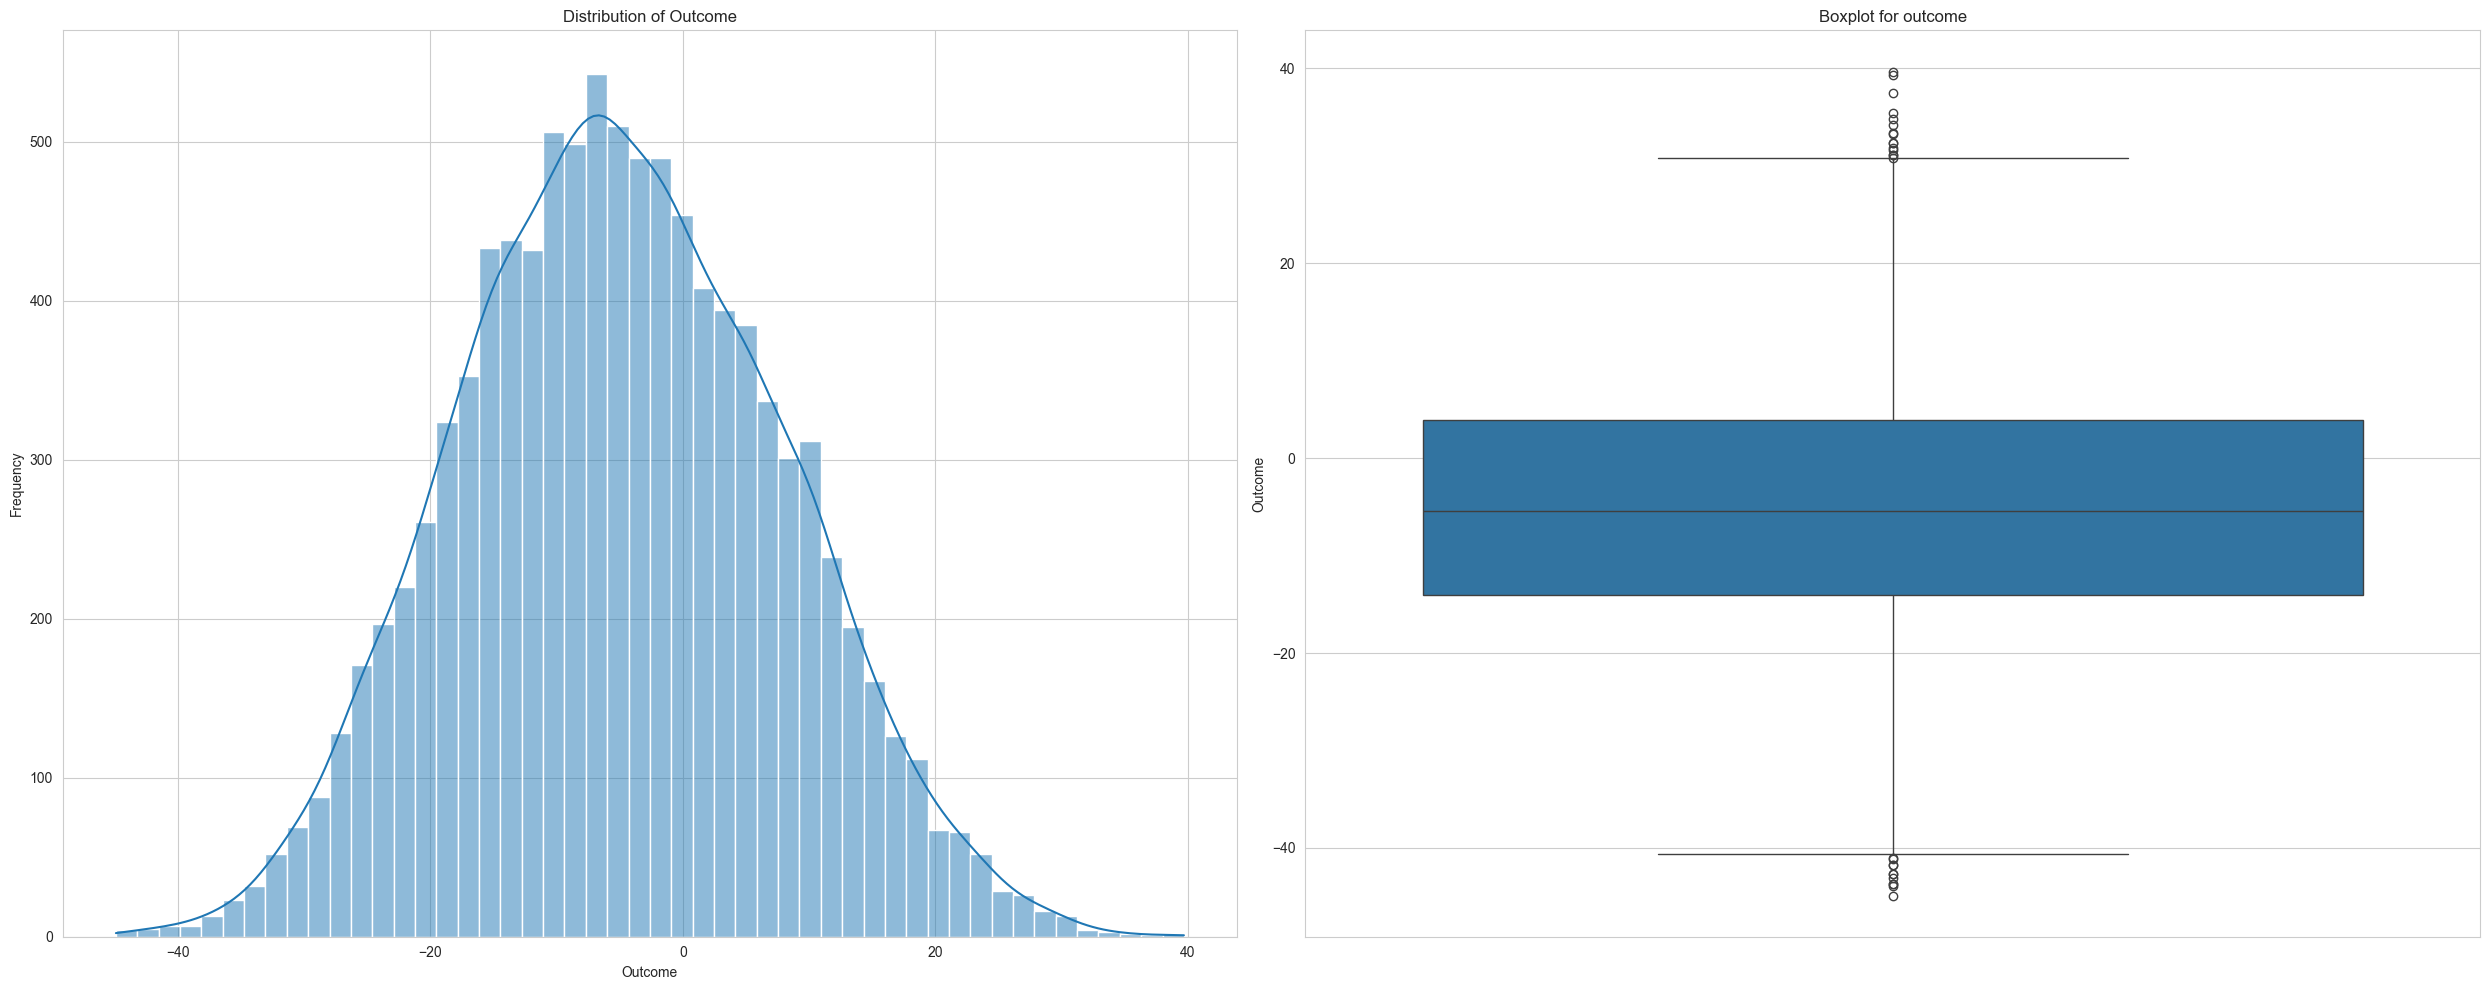

In [120]:
# Plot distribution of the target variable outcome
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data["outcome"], bins=50, kde=True)
plt.title("Distribution of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(data["outcome"])
plt.title("Boxplot for outcome")
plt.ylabel("Outcome")

plt.tight_layout()
plt.show()

From this we can see that outcome seems to follow (loosely) a normal distribution 

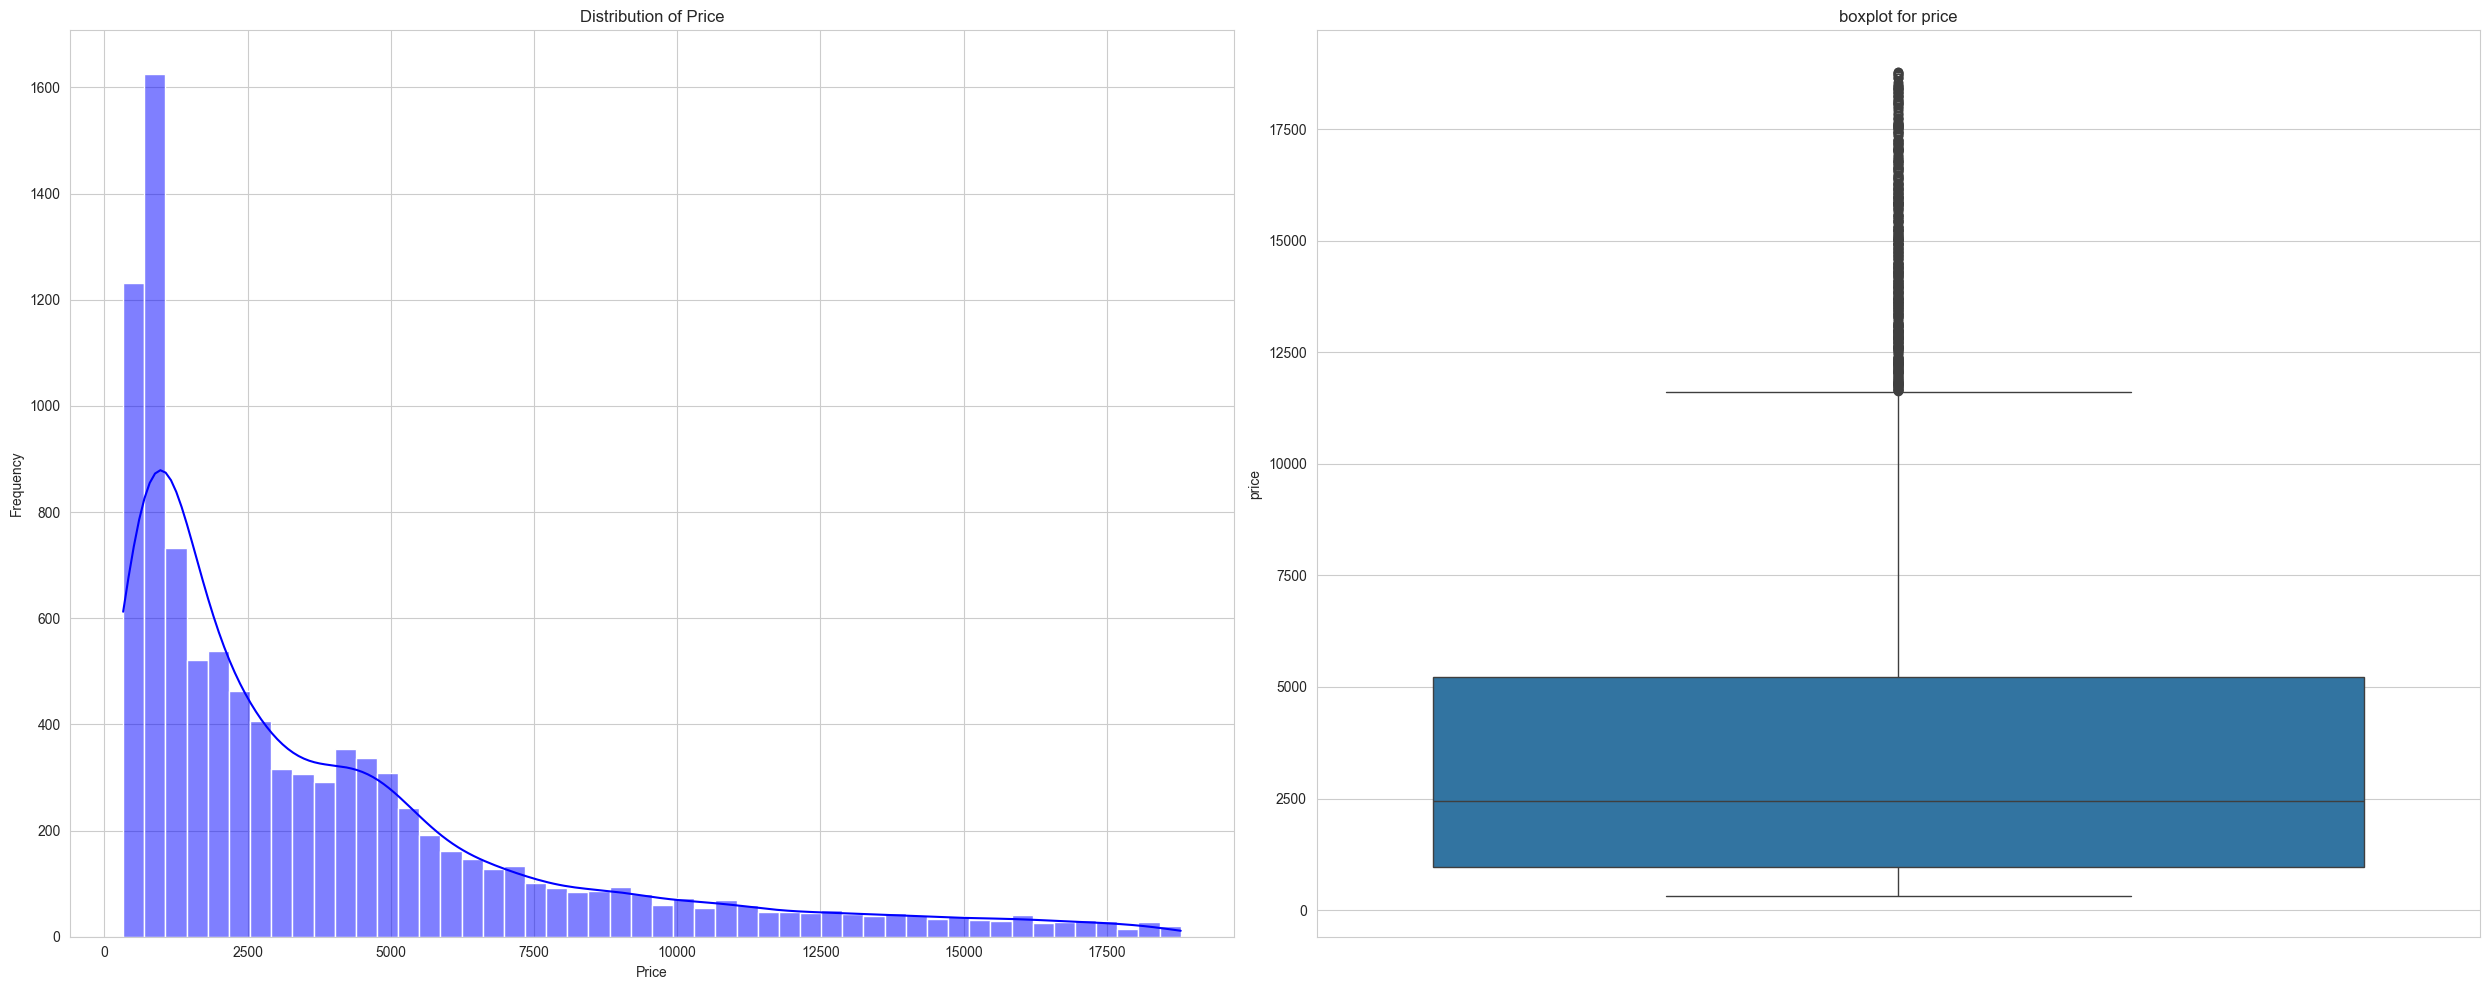

In [121]:
# Visualizing numerical feature distributions
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(data["price"])
plt.title("boxplot for price")
plt.ylabel("price")


plt.tight_layout()
plt.show()


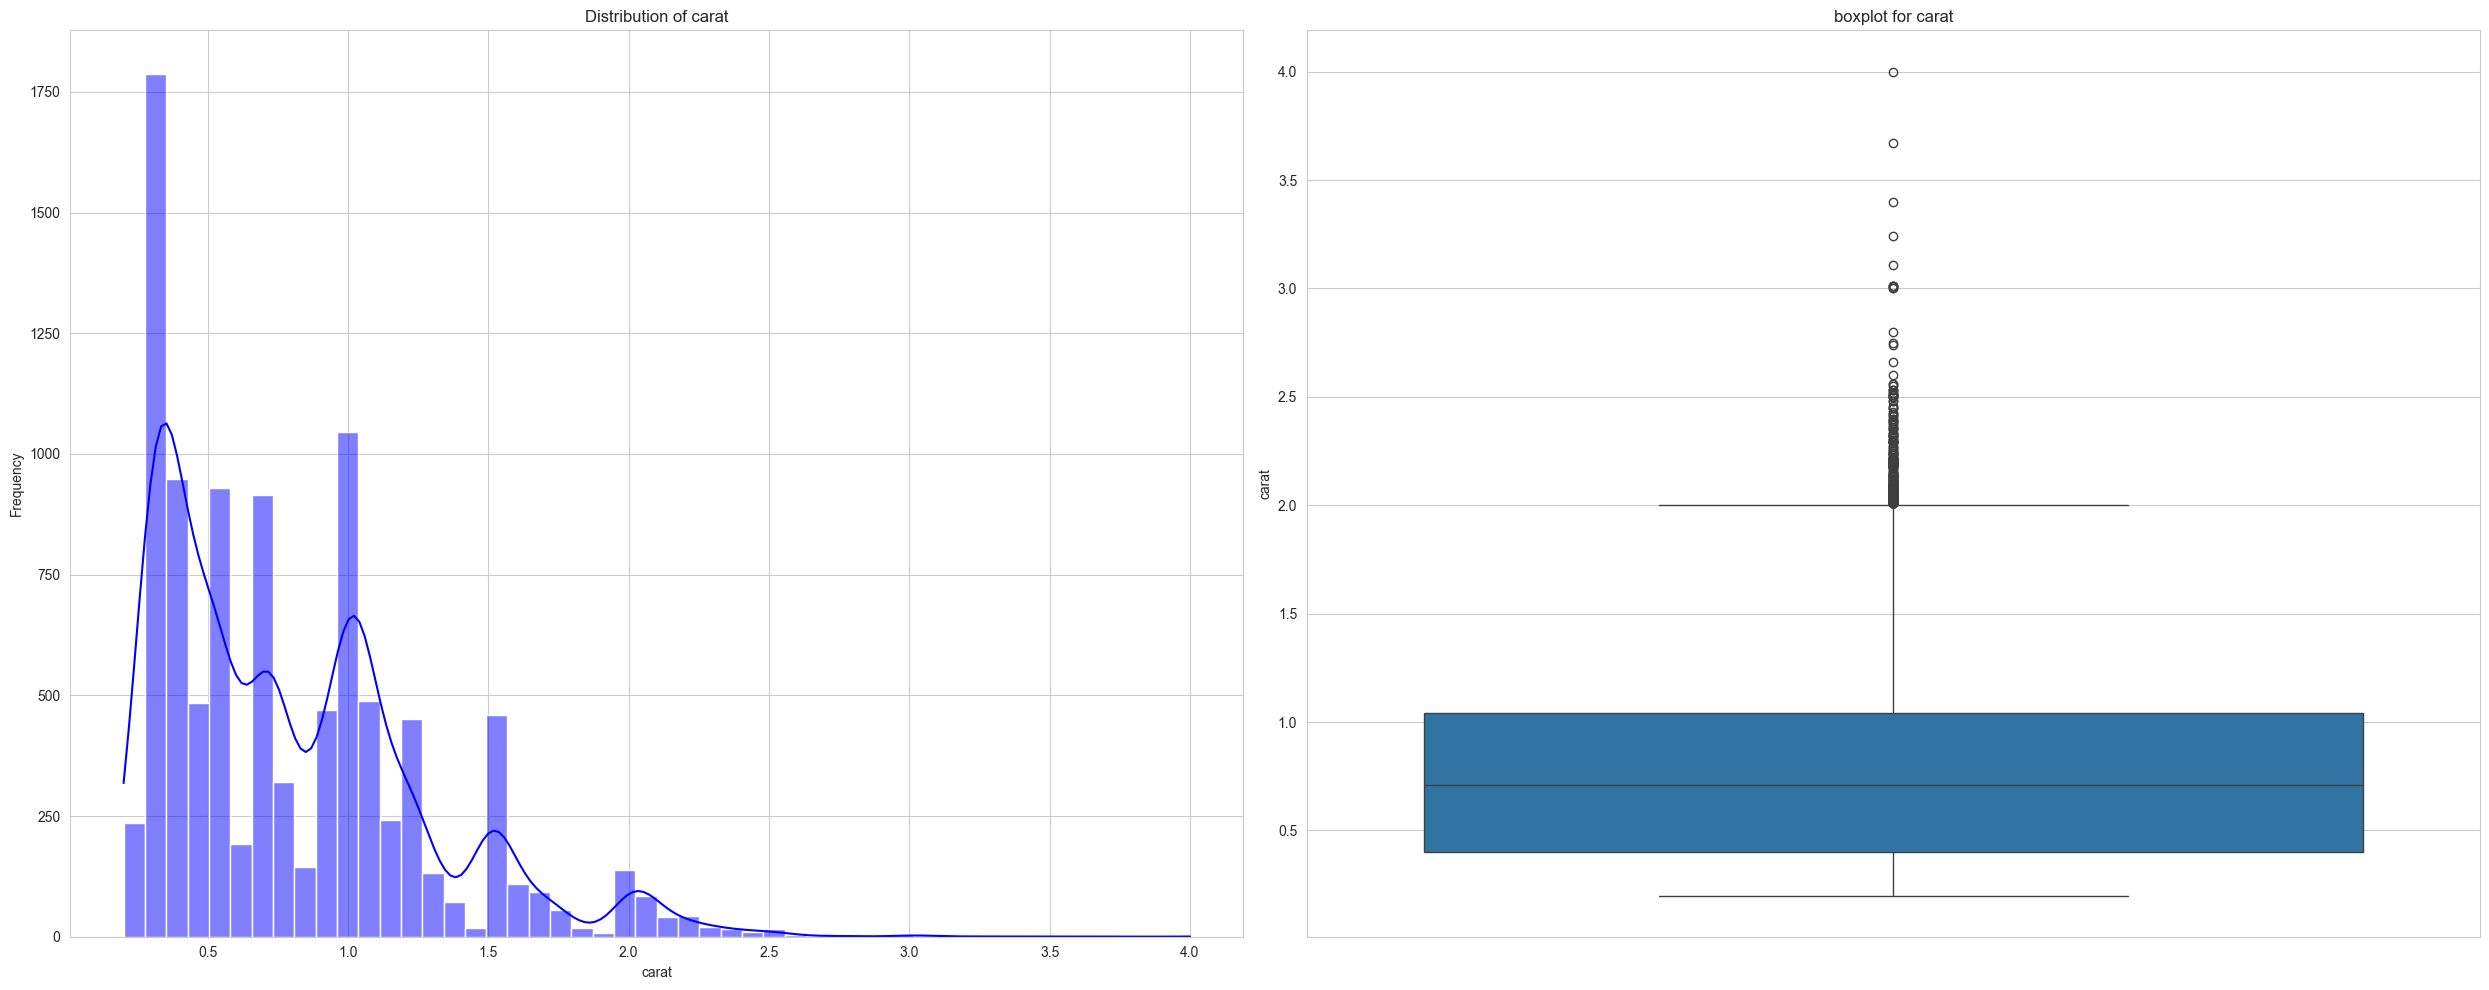

In [122]:
# Visualizing numerical feature distributions
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.histplot(data['carat'], bins=50, kde=True, color='blue')
plt.title("Distribution of carat")
plt.xlabel("carat")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(data["carat"])
plt.title("boxplot for carat")
plt.ylabel("carat")


plt.tight_layout()
plt.show()

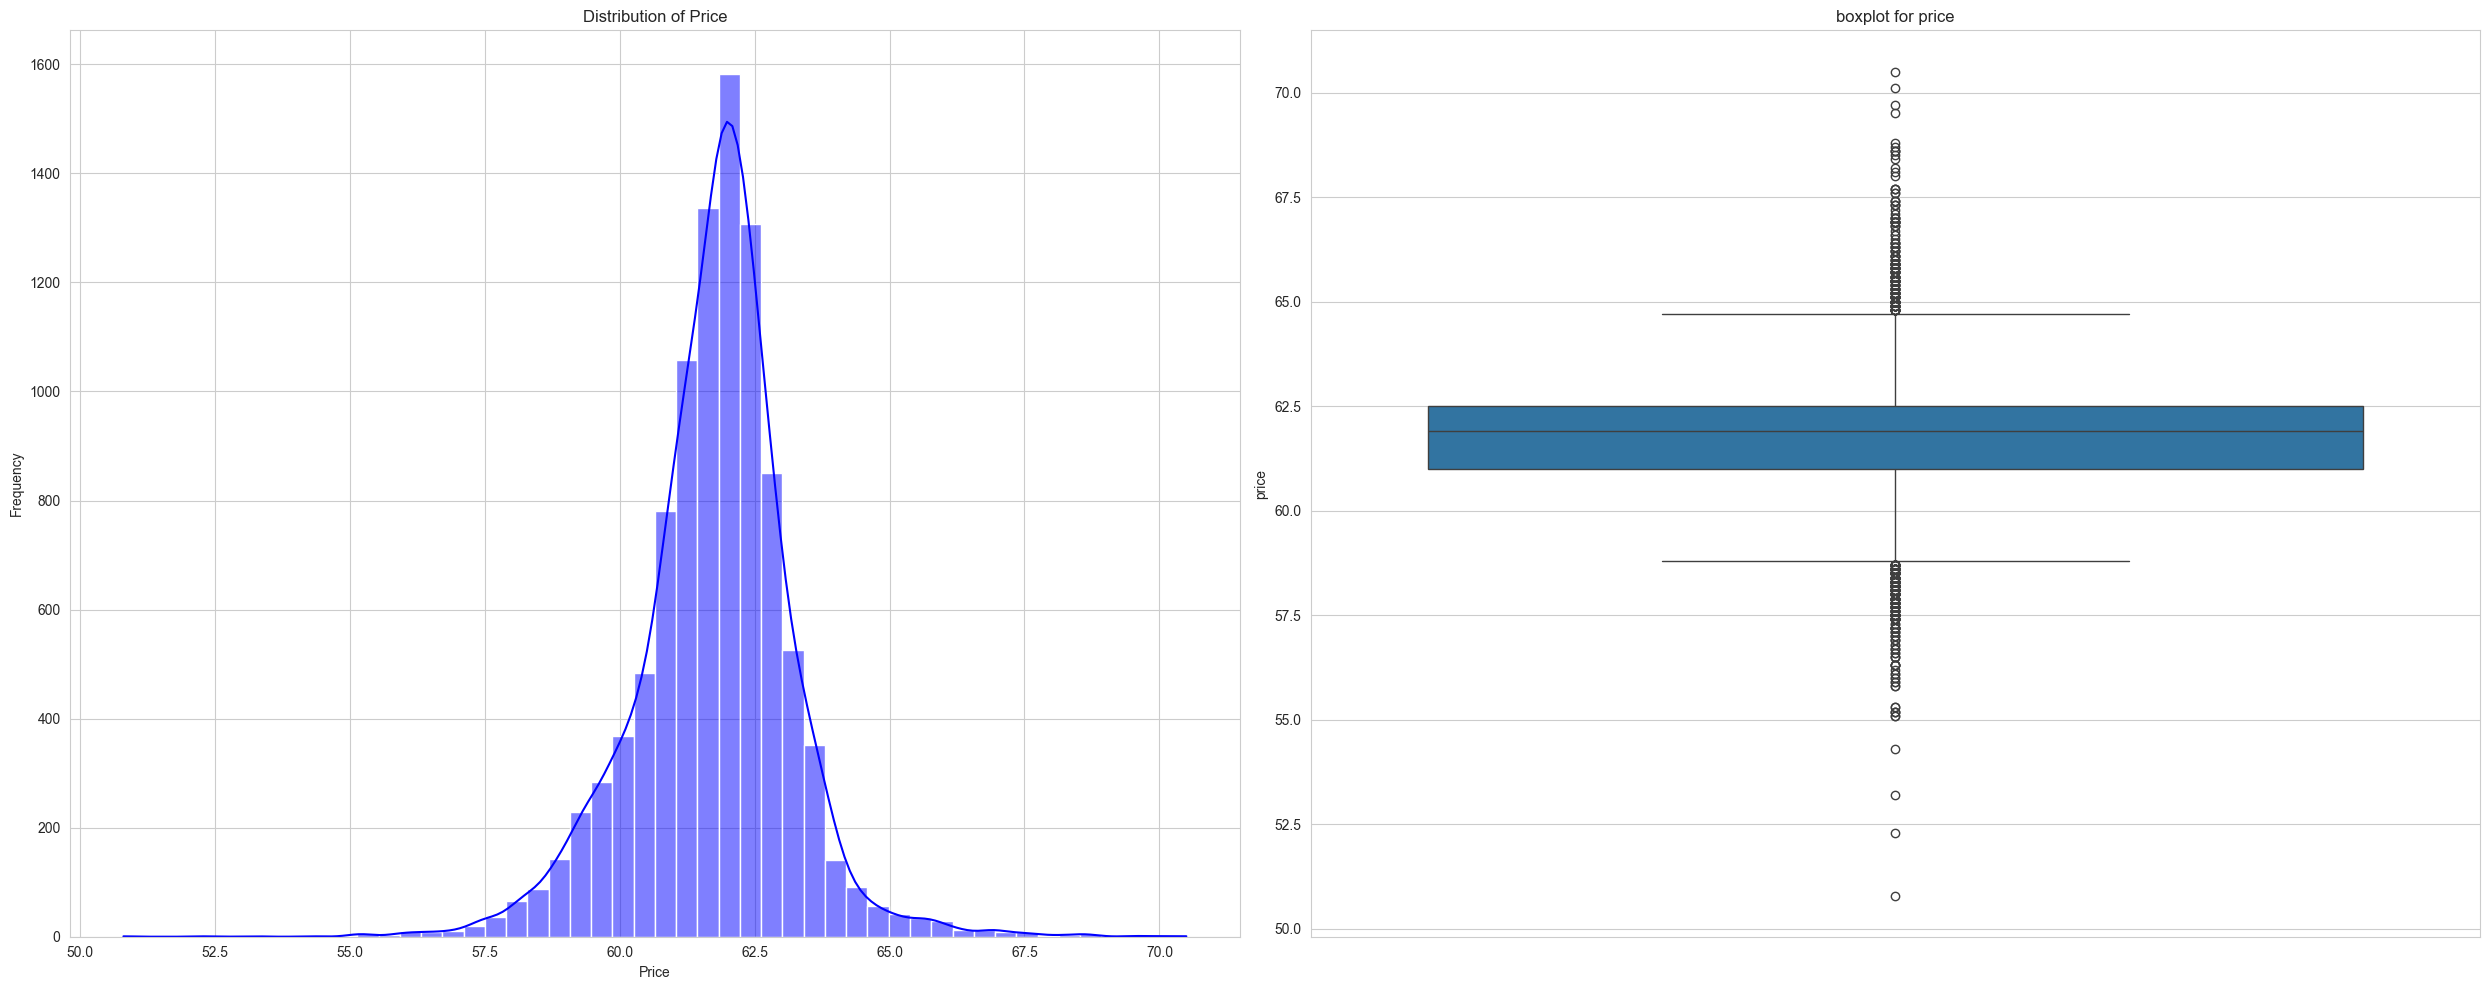

In [123]:
# Visualizing numerical feature distributions
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.histplot(data['depth'], bins=50, kde=True, color='blue')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(data["depth"])
plt.title("boxplot for price")
plt.ylabel("price")


plt.tight_layout()
plt.show()

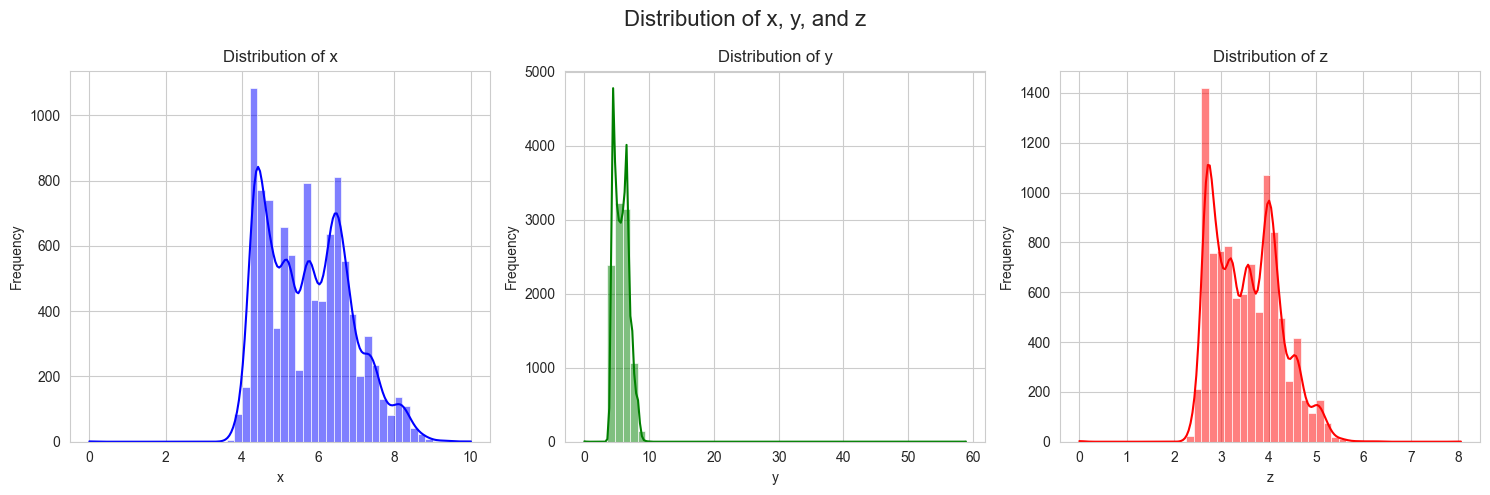

In [124]:
# Plot the distributions of x, y, and z as subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Distribution of x, y, and z", fontsize=16)

# List of features to plot
features = ['x', 'y', 'z']
colors = ['blue', 'green', 'red']

for i, feature in enumerate(features):
    sns.histplot(data[feature], bins=50, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

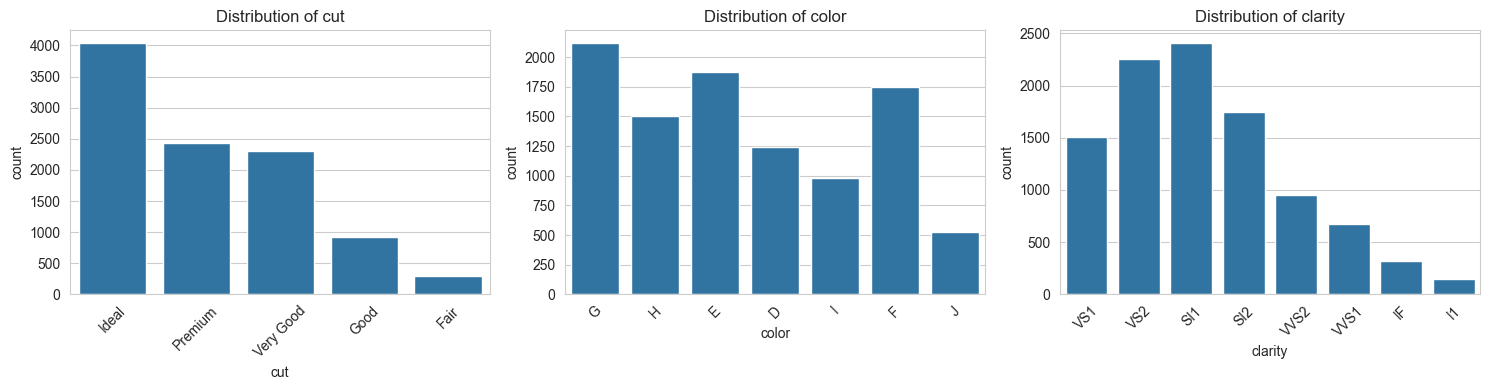

In [125]:
# Visualizing categorical feature distributions
plt.figure(figsize=(15, 4))
for i, col in enumerate(['cut', 'color', 'clarity']):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

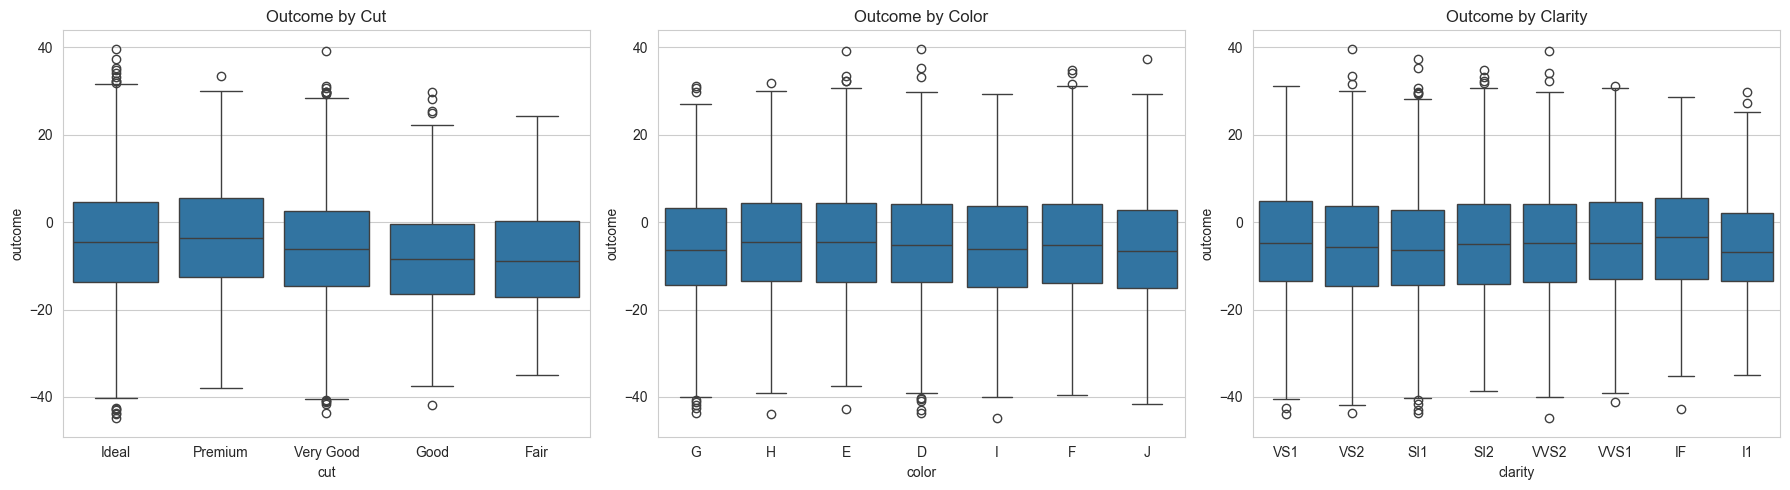

In [126]:

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="cut", y="outcome", data=data, ax=axes[0])
axes[0].set_title("Outcome by Cut")

sns.boxplot(x="color", y="outcome", data=data, ax=axes[1])
axes[1].set_title("Outcome by Color")

sns.boxplot(x="clarity", y="outcome", data=data, ax=axes[2])
axes[2].set_title("Outcome by Clarity")

plt.tight_layout()
plt.show()


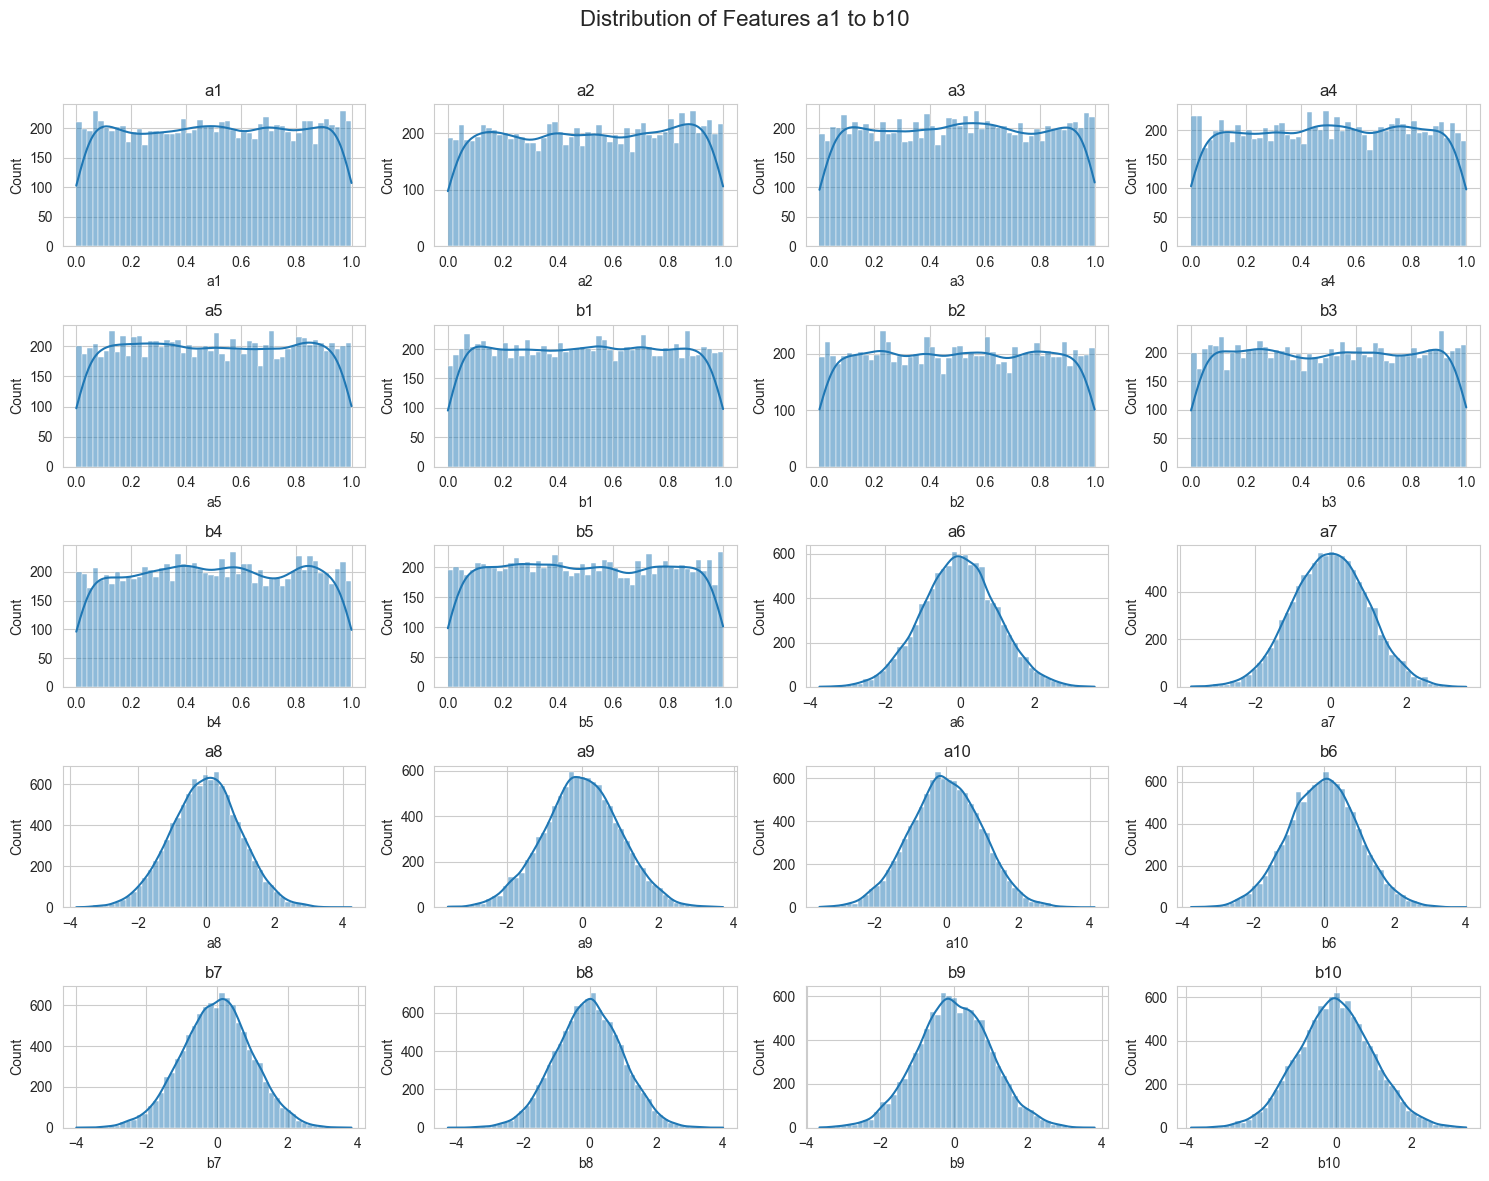

In [127]:
# Select columns a1 to b10
columns_to_plot = data.loc[:, "a1":"b10"]

# Set up the figure size
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
fig.suptitle("Distribution of Features a1 to b10", fontsize=16)

# Loop through columns and plot each distribution
for i, col in enumerate(columns_to_plot.columns):
    row, col_idx = divmod(i, 4)
    sns.histplot(data[col], bins=50, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Oh this is interesting, a1-a5 and b1-b5 seem to be follow (loosely) a uniform distribution ranging from 0 to 1 while a6-a10 and b6-b10 follow a normal distribution with mean 0 and standard deviation of 1

I suspect not all the features a1 - b10 are needed


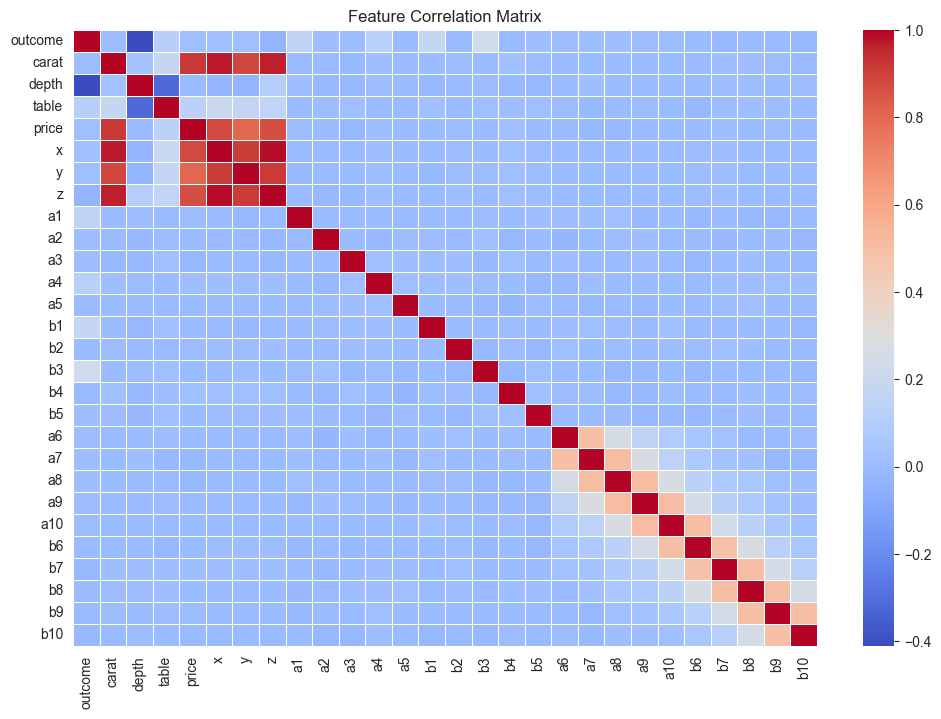

In [128]:
data_corr = data.drop(columns = ["cut", "color", "clarity"])
correlation_matrix = data_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Carat, price, x, y and z are all high correlated 

In [ ]:
# Top correlations with outcome
correlation_matrix['outcome'].sort_values(ascending=False)

In [144]:
features = ["carat", "depth", "table", "price", "x", "y", "z", "a1", "a2", "a3", "a4", "a5", "b1", 
            "b2", "b3", "b4", "b5", "a6", "a7", "a8", "a9", "a10", "b6", "b7", "b8", "b9", "b10"]

x = data.loc[:, features].values

y = data.loc[:,['outcome']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=27)

principalComponents = pca.fit_transform(x)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

cumulative_var_ratio

array([0.17363952, 0.27412724, 0.34937968, 0.40025612, 0.44902118,
       0.48827148, 0.52691946, 0.56478749, 0.60209294, 0.63937631,
       0.67641421, 0.71315554, 0.7497604 , 0.7858316 , 0.82103781,
       0.85616703, 0.88400568, 0.90871491, 0.92986251, 0.9471948 ,
       0.9617217 , 0.97499954, 0.98762806, 0.99520128, 0.99887854,
       0.99979594, 1.        ])